
# Data Science Lab Assignment 10
Name: Harendra Bangra\
Roll No: 197231\
Section: CSE-B

1. Implement Linear Discriminant Analysis (LDA) from scratch using Python\
a. Dataset: https://archive.ics.uci.edu/ml/datasets/Iris \
b. Group the training data into its respective classes . [Form a dictionary and save data grouped by classes it belongs to]\
c. Calculate mean vector of given training data of K-dimensions excluding the target class and calculate class-wise mean vector for the given training data\
d. Calculate scatter matrices needed to maximize the difference between means of given classes and minimize the variance of given classes.\
e. Calculate eigen values of M and get eigen vector pairs for first n (needed ) dimensions.\
f. Selecting Linear Discriminants for the new features subspace\
g. Sorting eigen vectors by decreasing eigenvalues\
h. Choosing k eigen vectors with the largest eigenvalues\
i. Transforming the samples onto the new subspace.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read and display head of csv file
df = pd.read_csv('/content/drive/MyDrive/197231_DSc_10/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(columns=['Id'])
df.shape

(150, 5)

In [5]:
y = df['Species']
X = df.drop(columns = ['Species'])
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Scale(normalize) dataset using sklearn's StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [8]:
labels = y.unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
class_feature_means = pd.DataFrame(columns=labels)
for c, rows in df.groupby('Species'):
    class_feature_means[c] = rows.mean()
class_feature_means

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,Iris-setosa,Iris-versicolor,Iris-virginica
SepalLengthCm,5.006,5.936,6.588
SepalWidthCm,3.418,2.770,2.974
PetalLengthCm,1.464,4.260,5.552
PetalWidthCm,0.244,1.326,2.026


In [10]:
within_class_scatter_matrix = np.zeros((4,4))
for c, rows in df.groupby('Species'):
    rows = rows.drop(['Species'], axis=1)
    s = np.zeros((4,4))
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(4,1)        
        s += (x - mc).dot((x - mc).T)
    
    within_class_scatter_matrix += s

In [11]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((4,4))
for c in class_feature_means:    
    n = len(df.loc[df['Species'] == c].index)
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [12]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [13]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

32.27195779972981
0.27756686384004514
5.422091066853206e-15
5.422091066853206e-15


In [14]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.9914724756595078
Eigenvector 1: 0.008527524340492263
Eigenvector 2: 1.6657973112958328e-16
Eigenvector 3: 1.6657973112958328e-16


In [15]:
w_matrix = np.hstack((pairs[0][1].reshape(4,1), pairs[1][1].reshape(4,1))).real

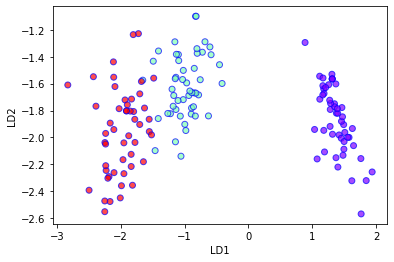

In [16]:
X_afterLDA = np.array(X.dot(w_matrix))

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df['Species'])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_afterLDA[:,0],
    X_afterLDA[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [18]:
data = pd.read_csv('/content/drive/MyDrive/197231_DSc_10/Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [19]:
y = data['Customer_Segment']
X = data.drop(columns = ['Customer_Segment'])
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
# Scale(normalize) dataset using sklearn's StandardScaler
X_norm = StandardScaler().fit_transform(X)

In [21]:
LDA = LinearDiscriminantAnalysis(n_components=2) 
X_afterLDA = LDA.fit_transform(X_norm,y)
print(X_afterLDA.shape)

(178, 2)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_afterLDA,y,test_size=0.2,random_state=0) 

In [23]:
LogiRegr = LogisticRegression()
LogiRegr.fit(X_train, y_train)

LogisticRegression()

In [24]:
# Use score method to get accuracy of model
score = LogiRegr.score(X_test, y_test)
score*=100
print(f'Accuracy is {score}%')

Accuracy is 100.0%


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [26]:
predictions = LogiRegr.predict(X_test)

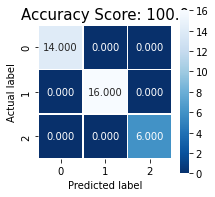

In [27]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);